In [1]:
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

DATASET_PATH = './augmented/'
im_w = 200
im_h = 200
num_classes = 6

In [11]:
files = os.listdir(DATASET_PATH)

rawx=[]
rawy=[]
for file in files:
    img = cv2.imread(os.path.join(DATASET_PATH,file),cv2.IMREAD_GRAYSCALE)
    rawx.append(img)
    u = file.split('_')
    rawy.append(u[2])

In [12]:
x = np.asarray(rawx)
y = np.asarray(rawy)
x = x.reshape(len(files),im_h,im_w,1)
print(x.shape)
print(y.shape)

(21600, 200, 200, 1)
(21600,)


In [13]:
rawx= None
rawy= None

In [14]:
x = x / 255.0

In [15]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5'], dtype='<U1')

In [16]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,stratify=y)

In [17]:
x = None
y = None

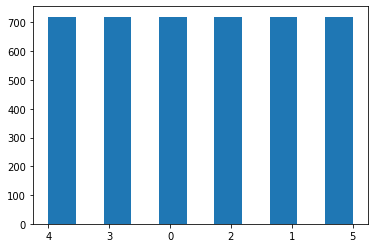

In [18]:
plt.hist(ytest,bins=11);

In [19]:
def plot_6_images(xt,yt):
    
    idxs = [ random.randint(0,len(xt)) for i in range(0,6)]
    plt.figure(figsize=(10,5))
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(xt[idxs[i]].reshape(200,200),cmap='gray')
        plt.title('y={}'.format(yt[idxs[i]]))
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()  

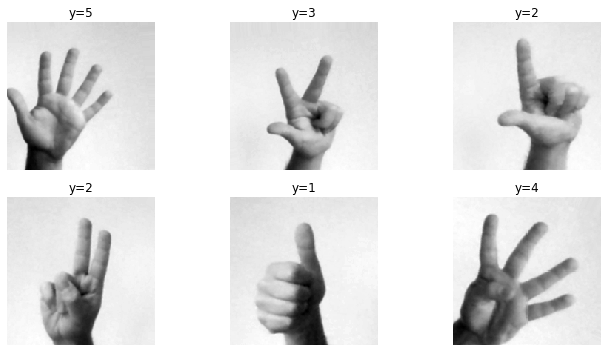

In [20]:
plot_6_images(xtrain,ytrain)

In [21]:
from keras.backend import clear_session

clear_session()
np.random.seed(37)
model = None

Using TensorFlow backend.


In [22]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import SGD, adam
from keras.metrics import sparse_categorical_accuracy, accuracy

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(im_w,im_h,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=sparse_categorical_crossentropy,
              optimizer=adam(),
              metrics=[sparse_categorical_accuracy])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 99, 99, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 128)      

In [28]:
# from keras.preprocessing.image import ImageDataGenerator 

# datagen = ImageDataGenerator(
#                          rotation_range=15, 
#                          zoom_range=0.1,
#                          width_shift_range=0.1, 
#                          height_shift_range=0.1, 
#                          shear_range=0.1, 
#                          horizontal_flip=True, 
#                          fill_mode="nearest",
#                          validation_split=0.2)

# datagen.fit(xtrain)

# BS = 128
# training_generator = datagen.flow(xtrain, ytrain, batch_size=BS,subset='training',seed=37)
# validation_generator = datagen.flow(xtrain, ytrain, batch_size=BS,subset='validation',seed=37)




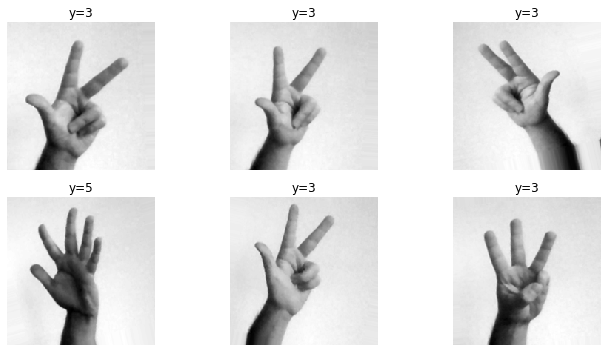

In [29]:
# x,y=training_generator.next()
# plot_6_images(x,y)

In [23]:

EPOC = 10
BS = 64

history = model.fit(xtrain, ytrain, validation_split=0.2, batch_size=BS, epochs=EPOC)


# history = model.fit_generator(training_generator,
#                               steps_per_epoch = BS, 
#                               epochs = EPOC, 
#                               validation_data = validation_generator, 
#                               validation_steps = BS//4,
#                               )

# history = model.fit_generator(datagen, steps_per_epoch=len(xtrain)//BS , epochs=epochs)

# history = model.fit_generator(datagen, validation_data=(xtest,ytest), 
#                               steps_per_epoch=len(xtrain)//16 , epochs=epochs)

Train on 13824 samples, validate on 3456 samples
Epoch 1/10
13824/13824 [==============================] - 74s 5ms/step - loss: 0.3572 - sparse_categorical_accuracy: 0.8826 - val_loss: 14.9859 - val_sparse_categorical_accuracy: 0.1672
Epoch 2/10
13824/13824 [==============================] - 67s 5ms/step - loss: 0.1178 - sparse_categorical_accuracy: 0.9640 - val_loss: 12.9028 - val_sparse_categorical_accuracy: 0.2017
Epoch 3/10
13824/13824 [==============================] - 67s 5ms/step - loss: 0.0588 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.1473 - val_sparse_categorical_accuracy: 0.9566
Epoch 4/10
13824/13824 [==============================] - 67s 5ms/step - loss: 0.0687 - sparse_categorical_accuracy: 0.9813 - val_loss: 1.4142 - val_sparse_categorical_accuracy: 0.7867
Epoch 5/10
13824/13824 [==============================] - 65s 5ms/step - loss: 0.0713 - sparse_categorical_accuracy: 0.9833 - val_loss: 18.7329 - val_sparse_categorical_accuracy: 0.4358
Epoch 6/10
13824/13824 

In [24]:
history.params

{'batch_size': 64,
 'epochs': 10,
 'steps': None,
 'samples': 13824,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss',
  'sparse_categorical_accuracy',
  'val_loss',
  'val_sparse_categorical_accuracy']}

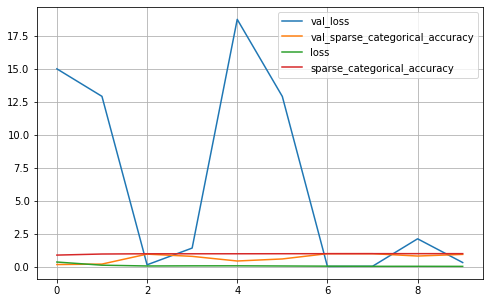

In [25]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [33]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 1s 18ms/step


[57.55665105183919, 0.2666666805744171]

In [ ]:
import pandas as pd
ypred = model.predict_classes(xtest)

pd.crosstab(ytest, ypred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
model.save('model.h5')

In [ ]:
from keras.models import load_model
mymodel = load_model('model.h5')

In [ ]:

myimg = cv2.imread('./originals/original_3_89.png',cv2.IMREAD_GRAYSCALE)

myimg = myimg/255.

plt.imshow(myimg)
myimg = myimg.reshape(1,200,200,1)

myclass = mymodel.predict(myimg)
pred = np.argmax(myclass)
pred